# Introduction
In this document I highligh the steps I take to solve the two assignments given. The first solve is for the project Gutenberg, followed by the streaming tweets.

## Assignment 3: Project Gurtenberg
So in this part of the document we'll extract texts from two books from https://www.gutenberg.org/browse/scores/top ,and make a wordcloud of the most frequent words

In [1]:
import matplotlib.image as mpimg
import preprocessor as p
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from textblob import TextBlob
from nltk.corpus import stopwords
from operator import itemgetter
from wordcloud import WordCloud
from pathlib import Path


#### Book 1: Call Of the Wild

In [3]:
callBlob = TextBlob(Path('TheCallOfTheWild.txt').read_text(errors = 'ignore'))

In [4]:
callItems = callBlob.word_counts.items()

In [5]:
stop_words=stopwords.words('english')

Eliminating the stopwords

In [6]:
callItems = [item for item in callItems if item[0] not in stop_words]

Sorting the items to get the top 20

In [7]:
callSorted = sorted(callItems, key=itemgetter(1), reverse=True)

In [8]:
callTop20 = callSorted[:20]

In [9]:
callDataframe = pd.DataFrame(callTop20, columns=['words','count'])

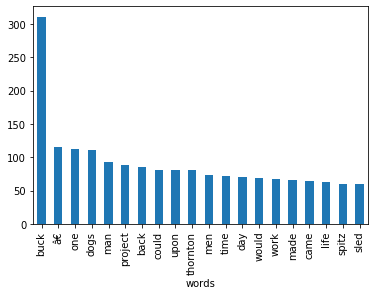

In [10]:
axes = callDataframe.plot.bar(x='words',y='count', legend=False)

Converting our data frame to a tupule to be able to create a wordcloud from it that we will inturn use to save in an image

In [11]:
callTupules = [tuple(x) for x in callDataframe.values]

In [12]:
callWordcloud = WordCloud(width = 2000, height= 2000, prefer_horizontal=0.5, min_font_size=10, colormap='prism', background_color='white').generate_from_frequencies(dict(callTupules))

In [13]:
callPicture = callWordcloud. to_file('call.png')

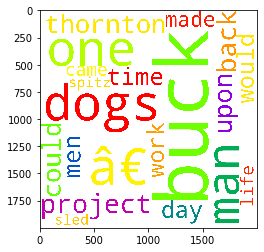

In [14]:
plt.imshow(callPicture)

#### Book 2: Peter Pan

In [15]:
peterBlob = TextBlob(Path('PeterPan.txt').read_text(errors = 'ignore'))

In [16]:
peterItems = peterBlob.word_counts.items()

In [17]:
peterItems = [item for item in peterItems if item[0] not in stop_words]

In [18]:
peterSorted = sorted(peterItems, key=itemgetter(1), reverse=True)

In [19]:
peterTop20 = peterSorted[:20]

In [20]:
peterDataframe = pd.DataFrame(peterTop20, columns=['words','count'])

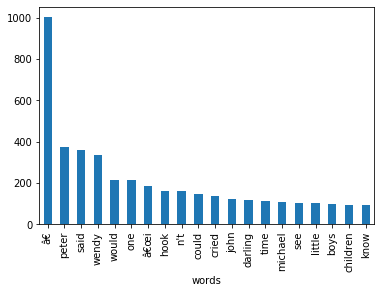

In [21]:
axes = peterDataframe.plot.bar(x='words',y='count', legend=False)

In [22]:
peterTupules = [tuple(x) for x in peterDataframe.values]

In [23]:
peterWordcloud = WordCloud(width = 2000, height= 2000, prefer_horizontal=0.5, min_font_size=10, colormap='prism', background_color='white').generate_from_frequencies(dict(peterTupules))

In [24]:
peterPicture = peterWordcloud. to_file('call.png')

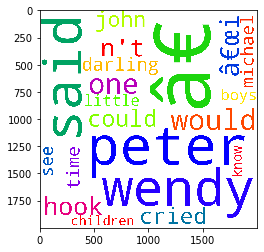

In [25]:
plt.imshow(peterPicture)

## Assignment 4: Twitter task

Stream tweets for 3 session - create wordcloud for each word cloud/bar chart for each.

harvest data from news media - maps with what is current

use similar approach to get from media

To achieve the expected goals of this taske, we create a substream listener subclass to gather all incoming and live tweet streams.

In [28]:
# Connect to our develper account via the authenticate api
import tweepy
import keys

In [29]:
auth=tweepy.OAuthHandler(keys.consumer_key, keys.consumer_secret)

In [30]:
auth.set_access_token(keys.access_token, keys.access_token_secret)

In [31]:
api=tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [32]:
class StreamListener(tweepy.StreamListener):
    
    def __init__(self):
        super().__init__()
        self.tweet_count=0
        self.TWEET_LIMIT = 19 
    def on_status(self, status):
        #self.tweet_count=0
        #self.TWEET_LIMIT = limit
        print(status.id_str)
        # if "retweeted_status" attribute exists, flag this tweet as a retweet.
        is_retweet = hasattr(status, "retweeted_status")

        # check if text has been truncated
        if hasattr(status,"extended_tweet"):
            text = status.extended_tweet["full_text"]
        else:
            text = status.text

        # check if this is a quote tweet.
        is_quote = hasattr(status, "quoted_status")
        quoted_text = ""
        if is_quote:
            # check if quoted tweet's text has been truncated before recording it
            if hasattr(status.quoted_status,"extended_tweet"):
                quoted_text = status.quoted_status.extended_tweet["full_text"]
            else:
                quoted_text = status.quoted_status.text

        # remove characters that might cause problems with csv encoding
        remove_characters = [",","\n"]
        for c in remove_characters:
            text.replace(c," ")
            quoted_text.replace(c, " ")

        with open("tweet1.txt", "a", encoding='utf-8') as f:
            f.write("%s\n" % (text))
        self.tweet_count += 1
        #return self.tweet_count <= self.TWEET_LIMIT
        if self.tweet_count <= self.TWEET_LIMIT:
            return True
        else:

            return False
    def on_error(self, status_code):
        print("Encountered streaming error (", status_code, ")")
        sys.exit()

if __name__ == "__main__":
    # complete authorization and initialize API endpoint
    auth=tweepy.OAuthHandler(keys.consumer_key, keys.consumer_secret)
    auth.set_access_token(keys.access_token,keys.access_token_secret)
    api=tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
    


    # initialize stream
    streamListener = StreamListener()
    stream = tweepy.Stream(auth=api.auth, listener=streamListener,tweet_mode='extended')
    with open("tweet1.txt", "w", encoding='utf-8') as f:
        f.write("date,user,is_retweet,is_quote,text,quoted_text\n")
    tags = ["Manchester"]
    stream.filter(track=tags)

1339674004144177152
1339674004202942465
1339674004634931203
1339674004987133952
1339674006493024258
1339674007029899266
1339674007470108672
1339674007734501376
1339674007734542337
1339674008091062274
1339674014005026819
1339674014176796673
1339674015485587456
1339674015670153219
1339674017624698882
1339674017893117955
1339674018954289154
1339674019583447041
1339674020023812097
1339674019688280065


In [33]:
tweet1_text= Path('tweet1.txt').read_text(errors='ignore')

In [34]:
#all Preprocessor options enabled
p.set_options(p.OPT.URL, p.OPT.RESERVED, p.OPT.SMILEY, p.OPT.NUMBER, p.OPT.HASHTAG,p.OPT.MENTION,p.OPT.NUMBER)

In [35]:
clean_tweet1_text=p.clean(tweet1_text)

In [36]:
tweet1_blob=TextBlob(clean_tweet1_text)

In [37]:
tweet1_items=tweet1_blob.word_counts.items()

In [39]:
tweet1_stop_words=stopwords.words('english')

In [40]:
tweet1_stopwords_list = ['RT','ðÿ‡¬ðÿ‡§ðÿ‡ºðÿ‡¸	','ukâ€	','“','rt','date,user,is_retweet,is_quote,text,quoted_text','@','United','Kingdom']
tweet1_stop_words.extend(tweet1_stopwords_list)

In [41]:
#elimiate stop words
tweet1_items =[item for item in tweet1_items if item[0] not in tweet1_stop_words]

In [42]:
tweet1_sorted_items=sorted(tweet1_items, key=itemgetter(1), reverse=True)

In [43]:
tweet1_top20=tweet1_sorted_items[:20]

In [44]:
tweet1_df=pd.DataFrame(tweet1_top20, columns=['words','count'])

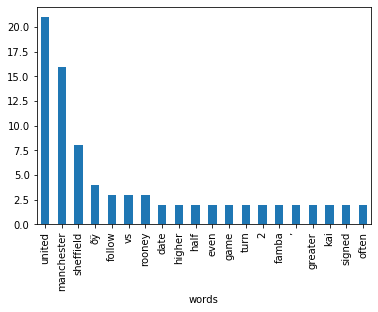

In [45]:
axes=tweet1_df.plot.bar(x='words',y='count', legend=False)

In [46]:
tweet1_tuples = [tuple(x) for x in tweet1_df.values]

In [47]:
tweet1_wordcloud1 = WordCloud(width = 2000, height= 2000, prefer_horizontal=0.5, min_font_size=10, colormap='prism', background_color='white').generate_from_frequencies(dict(tweet1_tuples))

In [48]:
tweet1_wordcloud_1 = tweet1_wordcloud1.to_file('tweet1.png')

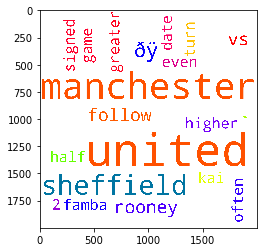

In [49]:
plt.imshow(tweet1_wordcloud1)

We run this stream at a time when manchester united is playing Sheffiled in the premiere league and twitter is able to update everyon on the scores and whats influential. Manchester united is mentioned more because of its popularity among football fans and sheffiled comes close too seeing that its playing at the momen. The word united is used the most since both teams have united in their names and the frequency of united is counted both for sheffiled and manchester united.

### Comparing twitter data to News outlets
For this we use a data from a football site that can keep up, sky sports will be my source.

In [50]:
import requests

In [51]:
response=requests.get('https://www.skysports.com/football')

In [53]:
sky_url = 'https://www.skysports.com/football'
sky_page = requests.get(sky_url)
sky_content = sky_page.text

In [54]:
from bs4 import BeautifulSoup

In [56]:
soup = BeautifulSoup(sky_content, 'html.parser')

In [58]:
sky_text = soup.get_text(strip = True)

In [59]:
sky_blob = TextBlob(sky_text)

In [60]:
sky_items = sky_blob.word_counts.items()

In [61]:
sky_stopwords = stopwords.words('english')

Additional stopwords

In [82]:
sky_stopwords_list = ['class','e','li','span', 'function','n','var','href','div','https','r','0', 'return','optionsshare','ul','site_login_link','toolsfacebooktwittershareview','morenextarticle','linkread',
                      'links.posted','hours','minutes','sky','sports', '1','matches_item-col','site-login_item','site-nav-desktop_menu-item','site-nav-desktop_menu-item','share','postcopy','news','contentnew']
sky_stopwords.extend(sky_stopwords_list)

In [83]:
#elimiate stop words
sky_items =[item for item in sky_items if item[0] not in sky_stopwords]

In [84]:
sky_sorted_items=sorted(sky_items, key=itemgetter(1), reverse=True)

In [85]:
sky_sorted_items[len(sky_sorted_items)-1]

('qhatrwjdgegbvrvbsurp', 1)

In [86]:
# limiting the array to  20 items
sky_top20=sky_sorted_items[:20]

In [87]:
sky_df=pd.DataFrame(sky_top20, columns=['words','count'])

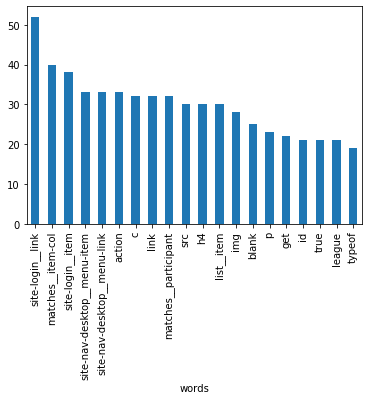

In [88]:
axes=sky_df.plot.bar(x='words',y='count', legend=False)

Now however unclean the data is from a deeper analysis we can see that news from twitter dooes show us a more accurate description of the news as it is it gives us a more real time analysis.

I will create additional sessions to shw how the twitter wordcloud changes with time and how it gets updated compared to the news site that generally remains unchanged for hours.

### Session 2

In [111]:
class StreamListener(tweepy.StreamListener):
    
    def __init__(self):
        super().__init__()
        self.tweet_count=0
        self.TWEET_LIMIT = 19 
    def on_status(self, status):
        #self.tweet_count=0
        #self.TWEET_LIMIT = limit
        print(status.id_str)
        # if "retweeted_status" attribute exists, flag this tweet as a retweet.
        is_retweet = hasattr(status, "retweeted_status")

        # check if text has been truncated
        if hasattr(status,"extended_tweet"):
            text = status.extended_tweet["full_text"]
        else:
            text = status.text

        # check if this is a quote tweet.
        is_quote = hasattr(status, "quoted_status")
        quoted_text = ""
        if is_quote:
            # check if quoted tweet's text has been truncated before recording it
            if hasattr(status.quoted_status,"extended_tweet"):
                quoted_text = status.quoted_status.extended_tweet["full_text"]
            else:
                quoted_text = status.quoted_status.text

        # remove characters that might cause problems with csv encoding
        remove_characters = [",","\n"]
        for c in remove_characters:
            text.replace(c," ")
            quoted_text.replace(c, " ")

        with open("tweet1.txt", "a", encoding='utf-8') as f:
            f.write("%s\n" % (text))
        self.tweet_count += 1
        #return self.tweet_count <= self.TWEET_LIMIT
        if self.tweet_count <= self.TWEET_LIMIT:
            return True
        else:

            return False
    def on_error(self, status_code):
        print("Encountered streaming error (", status_code, ")")
        sys.exit()

if __name__ == "__main__":
    # complete authorization and initialize API endpoint
    auth=tweepy.OAuthHandler(keys.consumer_key, keys.consumer_secret)
    auth.set_access_token(keys.access_token,keys.access_token_secret)
    api=tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
    


    # initialize stream
    streamListener = StreamListener()
    stream = tweepy.Stream(auth=api.auth, listener=streamListener,tweet_mode='extended')
    with open("tweet2.txt", "w", encoding='utf-8') as f:
        f.write("date,user,is_retweet,is_quote,text,quoted_text\n")
    tags = ["Manchester"]
    stream.filter(track=tags)

1339686032359493632
1339686032997044225
1339686033177403393
1339686033886228482
1339686035056373760
1339686035375222790
1339686038424461312
1339686039712133127
1339686041020735488
1339686042690084864
1339686045605113857
1339686045823188993
1339686046569664512
1339686047857455104
1339686048914403331
1339686049119948806
1339686050298511368
1339686050692788224
1339686058682925057
1339686059681177602


In [112]:
tweet2_text= Path('tweet2.txt').read_text(errors='ignore')

In [113]:
clean_tweet2_text=p.clean(tweet2_text)

In [114]:
tweet2_blob=TextBlob(clean_tweet2_text)

In [115]:
tweet2_items=tweet2_blob.word_counts.items()

In [116]:
tweet2_stop_words=stopwords.words('english')

In [117]:
tweet2_stopwords_list = ['RT','ðÿ‡¬ðÿ‡§ðÿ‡ºðÿ‡¸	','ukâ€	','“','rt','date,user,is_retweet,is_quote,text,quoted_text','@','United','Kingdom']
tweet2_stop_words.extend(tweet2_stopwords_list)

In [118]:
tweet2_items =[item for item in tweet2_items if item[0] not in tweet2_stop_words]

In [119]:
tweet2_sorted_items=sorted(tweet2_items, key=itemgetter(1), reverse=True)

In [120]:
tweet2_top20=tweet2_sorted_items[:20]

In [121]:
tweet2_df=pd.DataFrame(tweet2_top20, columns=['words','count'])

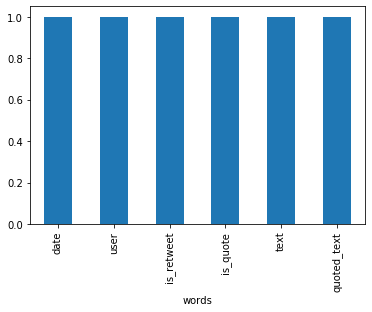

In [122]:
axes=tweet2_df.plot.bar(x='words',y='count', legend=False)

### Session 3 

In [135]:
streamListener = StreamListener()
stream = tweepy.Stream(auth=api.auth, listener=streamListener,tweet_mode='extended')
with open("tweet3.txt", "w", encoding='utf-8') as f:
    f.write("date,user,is_retweet,is_quote,text,quoted_text\n")
tags = ["Manchester"]
stream.filter(track=tags)

1339690479693262850
1339690479676436480
1339690479642939392
1339690480595054592
1339690480653594624
1339690481312276484
1339690481240985601
1339690482276954119
1339690483405230081
1339690483568689152
1339690483807903745
1339690484290248706
1339690484403490819
1339690486068555776
1339690486177673224
1339690486932643841
1339690486521585674
1339690487737925634
1339690488115437568
1339690488564240389


In [136]:
tweet3_text= Path('tweet3.txt').read_text(errors='ignore')

In [137]:
clean_tweet3_text=p.clean(tweet3_text)

In [138]:
tweet3_blob=TextBlob(clean_tweet3_text)

In [139]:
tweet3_items=tweet3_blob.word_counts.items()

In [140]:
tweet3_stop_words=stopwords.words('english')

In [141]:
tweet3_stopwords_list = ['RT','ðÿ‡¬ðÿ‡§ðÿ‡ºðÿ‡¸	','ukâ€	','“','rt','date,user,is_retweet,is_quote,text,quoted_text','@','United','Kingdom']
tweet3_stop_words.extend(tweet3_stopwords_list)

In [142]:
tweet3_items =[item for item in tweet3_items if item[0] not in tweet3_stop_words]

In [143]:
tweet3_sorted_items=sorted(tweet3_items, key=itemgetter(1), reverse=True)

In [144]:
tweet3_top20=tweet3_sorted_items[:20]

In [145]:
tweet3_df=pd.DataFrame(tweet3_top20, columns=['words','count'])

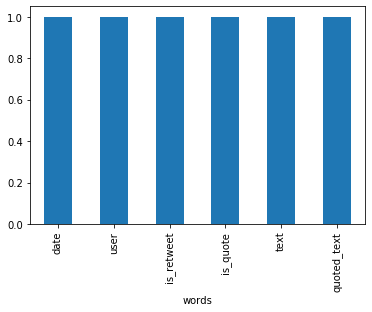

In [146]:
axes=tweet3_df.plot.bar(x='words',y='count', legend=False)

# Conclusion
Although the last two sessions didn't return anything due to a weak internet connection from the tests previously done in class and the first session compariosn I can state with confidence that tweets give us a more accurate depiction of the state of a topic or affair as it is. Tweets give us the most trending thing in the world related to the searched tag. During the time of our tweet streams we had the opportunity of getting game info as it pogressed while the nes outlets only had information before the game, we expect sky sports to update its site moments after the game while the tweets updated us with every moment in the discussion which in this case was a game. United will win. #GGMU